<a href="https://colab.research.google.com/github/arman-hossain45/Convolution-Neural-Network/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

# *CNN* cihar10 dataset

# here totall 10 types 60000  colourful images

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [5]:
#shape
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

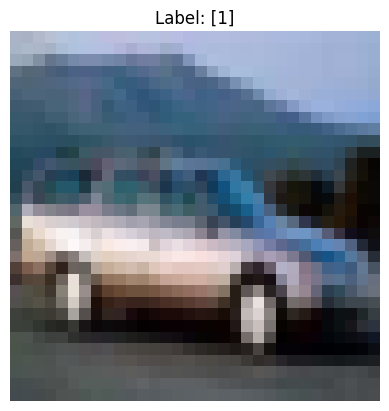

In [7]:
plt.imshow(x_train[4])
plt.title(f"Label: {y_train[4]}")
plt.axis('off')
plt.show()

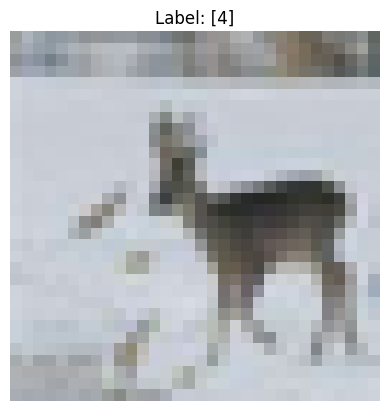

In [8]:
plt.imshow(x_train[20])
plt.title(f"Label: {y_train[20]}")
plt.axis('off')
plt.show()

# show multiple images


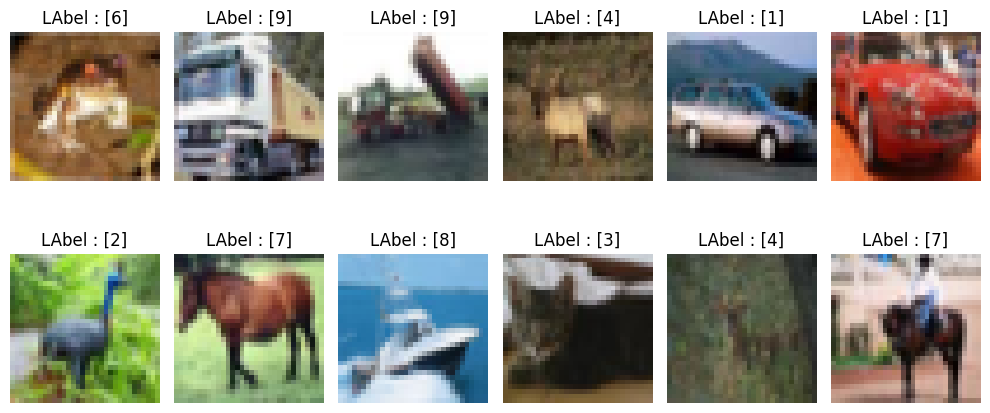

In [9]:
plt.figure(figsize=(10,5))

for i in range(12):
  plt.subplot(2,6,i+1)
  plt.imshow(x_train[i])
  plt.title(f"LAbel : {y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

# normalize the pixel values to the range

[0,1]

In [10]:
x_train,x_test=x_train/255.0,x_test/255.0

# Convert labels to one - dimentionl array

In [11]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [12]:
y_train.shape

(50000,)

In [13]:
y_test.shape

(10000,)

# cretate the model

In [14]:
cnn_model=models.Sequential()#api call sequential

# First Convolutional Block

In [15]:
cnn_model.add(layers.Conv2D(32,(3,3),# 32 ta 3*3 filter we use here or kernel
                            activation='relu',#  activation function
                            input_shape=(32,32,3)))#input size 3 is RGB means
cnn_model.add(layers.BatchNormalization())# more robust over
cnn_model.add(layers.MaxPooling2D((2,2)))# downsampling dimension reduce

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# secound Convolutional Block

In [16]:
cnn_model.add(layers.Conv2D(128,(3,3),activation='relu'))
cnn_model.add(layers.BatchNormalization())


# Third convolutional Block

In [17]:
cnn_model.add(layers.Conv2D(128,(3,3),activation='relu'))
cnn_model.add(layers.BatchNormalization())


# Fully connected Layers

In [18]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128,activation='relu'))
cnn_model.add(layers.Dropout(0.5))# overfit jeno na hoy
cnn_model.add(layers.Dense(10,activation="softmax"))# output layer
# totall 10 ta class

# Print model summary

In [19]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,506 (8.28 MB)

 Trainable params: 2,169,930 (8.28 MB)

 Non-trainable params: 576 (2.25 KB)

# complie the model

In [20]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
history= cnn_model.fit(x_train,y_train,# totall 50k data on training set
                       epochs=10,
                       batch_size=64,# totall 625 each batch
                       validation_split=0.2,
                       verbose=2)

Epoch 1/10
625/625 - 14s - 22ms/step - accuracy: 0.4040 - loss: 1.9643 - val_accuracy: 0.4106 - val_loss: 1.9032
Epoch 2/10
625/625 - 14s - 22ms/step - accuracy: 0.5516 - loss: 1.2726 - val_accuracy: 0.5206 - val_loss: 1.4274
Epoch 3/10
625/625 - 4s - 7ms/step - accuracy: 0.6240 - loss: 1.0712 - val_accuracy: 0.5862 - val_loss: 1.1727
Epoch 4/10
625/625 - 4s - 7ms/step - accuracy: 0.6770 - loss: 0.9231 - val_accuracy: 0.6562 - val_loss: 1.0459
Epoch 5/10
625/625 - 4s - 7ms/step - accuracy: 0.7168 - loss: 0.8104 - val_accuracy: 0.5900 - val_loss: 1.2819
Epoch 6/10
625/625 - 4s - 7ms/step - accuracy: 0.7487 - loss: 0.7100 - val_accuracy: 0.6966 - val_loss: 0.8918
Epoch 7/10
625/625 - 4s - 7ms/step - accuracy: 0.7799 - loss: 0.6250 - val_accuracy: 0.6880 - val_loss: 0.9238
Epoch 8/10
625/625 - 4s - 7ms/step - accuracy: 0.8100 - loss: 0.5418 - val_accuracy: 0.6267 - val_loss: 1.2760
Epoch 9/10
625/625 - 4s - 7ms/step - accuracy: 0.8318 - loss: 0.4841 - val_accuracy: 0.7097 - val_loss: 0.93

# Evluate on the test data

In [23]:
test_loss,test_accuracy=cnn_model.evaluate(x_test,y_test,verbose=2)
print(f"Test accuracy:{test_accuracy:.2f}")

313/313 - 2s - 5ms/step - accuracy: 0.7039 - loss: 0.9437
Test accuracy:0.70


In [27]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


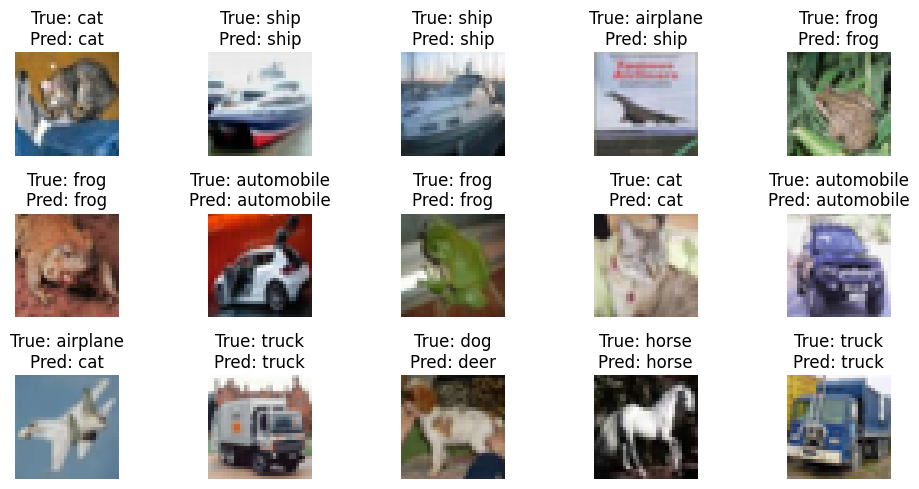

In [28]:

sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# plot accuracy and loss

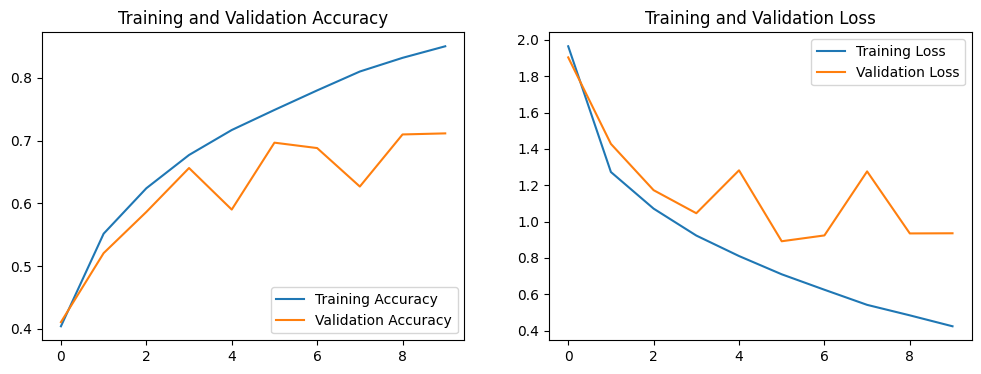

In [29]:


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


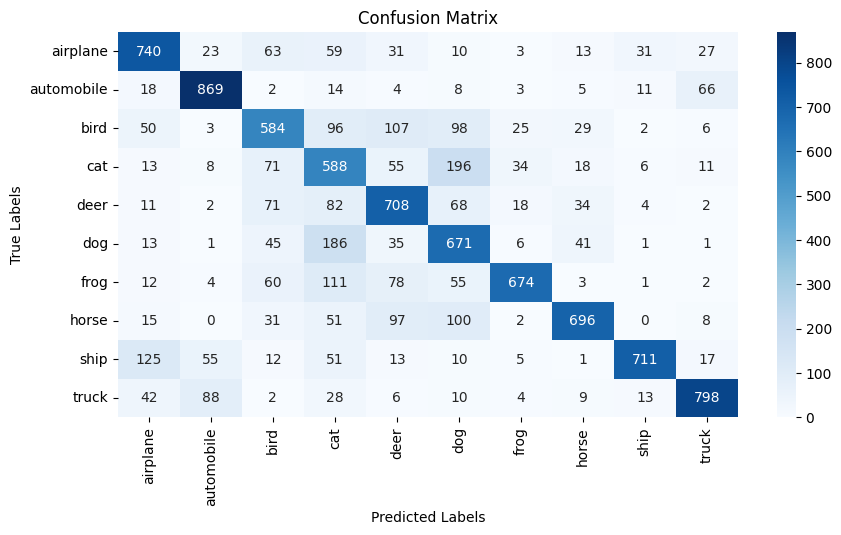

In [31]:

y_pred = np.argmax(cnn_model.predict(x_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# generate a classification report

In [32]:

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.71      0.74      0.73      1000
  automobile       0.83      0.87      0.85      1000
        bird       0.62      0.58      0.60      1000
         cat       0.46      0.59      0.52      1000
        deer       0.62      0.71      0.66      1000
         dog       0.55      0.67      0.60      1000
        frog       0.87      0.67      0.76      1000
       horse       0.82      0.70      0.75      1000
        ship       0.91      0.71      0.80      1000
       truck       0.85      0.80      0.82      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.71     10000
weighted avg       0.72      0.70      0.71     10000



# save the model

In [33]:

cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


# load and use the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


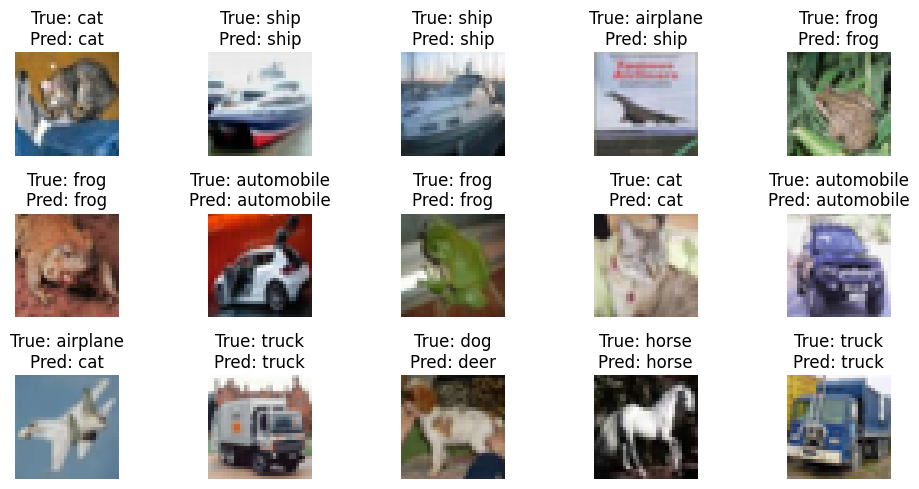

In [34]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()